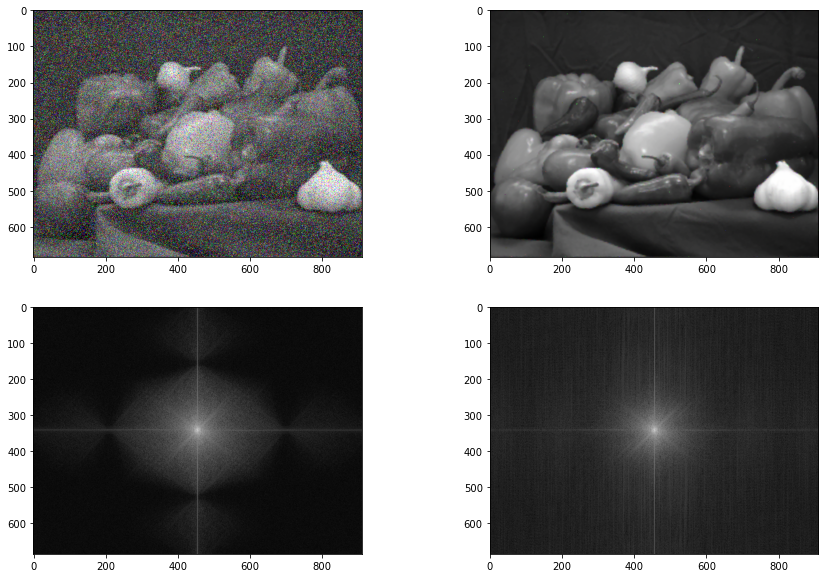

In [2]:
import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2gray


# Load an image
im_arr = cv2.imread("D:\grade3_sem2\computer_vesion\grey.png")

#convert a noise image to frequancy domain:
im_grey=rgb2gray(im_arr)
f = np.fft.fft2(im_grey)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)#abs is equivalent to Norm-2 L2
magnitude_spectrum_log_noise = np.log(magnitude_spectrum+1)


#apply s&p noise
noise_img = random_noise(im_arr, mode="s&p",amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')


# Apply median filter
median = cv2.medianBlur(noise_img,5)

#convert a clear image to frequancy domain:
im_grey2=rgb2gray(median)
f = np.fft.fft2(im_grey2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)#abs is equivalent to Norm-2 L2
magnitude_spectrum_log_clear = np.log(magnitude_spectrum+1)

# Display the image
fig, axs = plt.subplots(2,2,figsize=(15, 10))
#fig, axs = plt.subplots(1,3)
axs[0,0].imshow(noise_img)#axs[0,0] yields an error
axs[0,1].imshow(median)
axs[1,0].imshow(magnitude_spectrum_log_noise,cmap=plt.get_cmap('gray'))
axs[1,1].imshow(magnitude_spectrum_log_clear,cmap=plt.get_cmap('gray'))


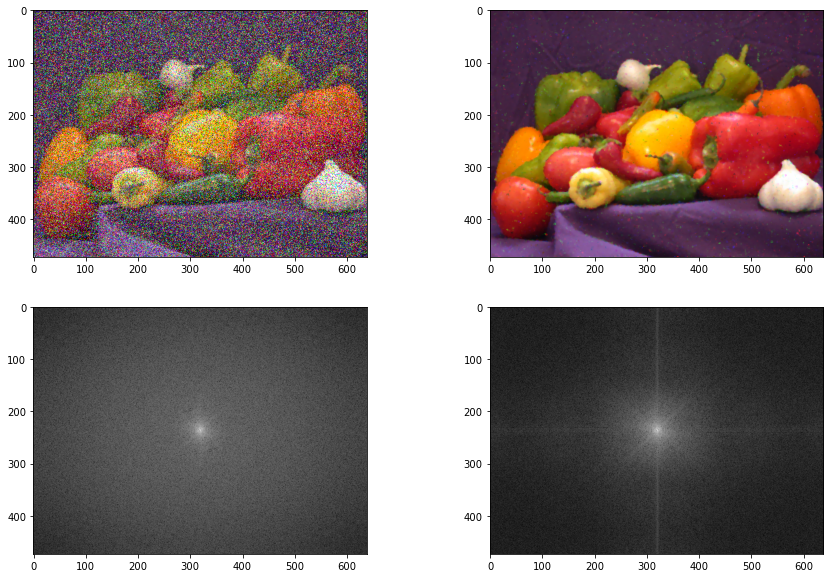

In [5]:
im = cv2.imread("D:\grade3_sem2\computer_vesion\jj.png")

#convert a noise image to frequancy domain:
im_grey=rgb2gray(im)
f = np.fft.fft2(im_grey)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)#abs is equivalent to Norm-2 L2
magnitude_spectrum_log_noise = np.log(magnitude_spectrum+1)


#apply s&p noise
noise_img = random_noise(im, mode="s&p",amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')
noise_im = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)

# Apply median filter
clear_im=noise_img
clear_im[:,:,0]=cv2.medianBlur(noise_img[:,:,0],5)
clear_im[:,:,1]=cv2.medianBlur(noise_img[:,:,1],5)
clear_im[:,:,2]=cv2.medianBlur(noise_img[:,:,2],5)
clear_im = cv2.cvtColor(clear_im, cv2.COLOR_BGR2RGB)

#convert a clear image to frequancy domain:
im_grey2=rgb2gray(clear_im)
f = np.fft.fft2(im_grey2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)#abs is equivalent to Norm-2 L2
magnitude_spectrum_log_clear = np.log(magnitude_spectrum+1)


#  display the effect:

fig, axs = plt.subplots(2,2,figsize=(15, 10))
axs[0,0].imshow(noise_im)#axs[0,0] yields an error
axs[0,1].imshow(clear_im)
axs[1,0].imshow(magnitude_spectrum_log_noise,cmap=plt.get_cmap('gray'))
axs[1,1].imshow(magnitude_spectrum_log_clear,cmap=plt.get_cmap('gray'))


